### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

### Load IMDb CSV files

In [19]:
train_df = pd.read_csv("imdb_train.csv")
test_df = pd.read_csv("imdb_test.csv")

X_train = train_df["text"].astype(str)
y_train = train_df["label"].astype(int)

X_test = test_df["text"].astype(str)
y_test = test_df["label"].astype(int)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

print("\nTraining label distribution:")
print(y_train.value_counts())

print("\nTesting label distribution:")
print(y_test.value_counts())

Training samples: 25000
Testing samples: 25000

Training label distribution:
label
0    12500
1    12500
Name: count, dtype: int64

Testing label distribution:
label
0    12500
1    12500
Name: count, dtype: int64


### Baseline vectorization (Initial Training)

In [11]:
tfidf_baseline = TfidfVectorizer(
    stop_words="english",
    max_features=1000,
    ngram_range=(1, 1)     
)

X_train_base = tfidf_baseline.fit_transform(X_train)
X_test_base = tfidf_baseline.transform(X_test)

print("Baseline TF-IDF completed")
print("Train shape:", X_train_base.shape)
print("Test shape :", X_test_base.shape)

Baseline TF-IDF completed
Train shape: (25000, 1000)
Test shape : (25000, 1000)


### Baseline Model 1: Logistic Regression (Initial Training Results)

In [21]:
lr_base = LogisticRegression(max_iter=1000)
lr_base.fit(X_train_base, y_train)

lr_base_pred = lr_base.predict(X_test_base)
lr_base_acc = accuracy_score(y_test, lr_base_pred)

print("Baseline Logistic Regression Accuracy:", lr_base_acc)
print("\nClassification Report (LR Baseline):\n")
print(classification_report(y_test, lr_base_pred))

Baseline Logistic Regression Accuracy: 0.85584

Classification Report (LR Baseline):

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     12500
           1       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



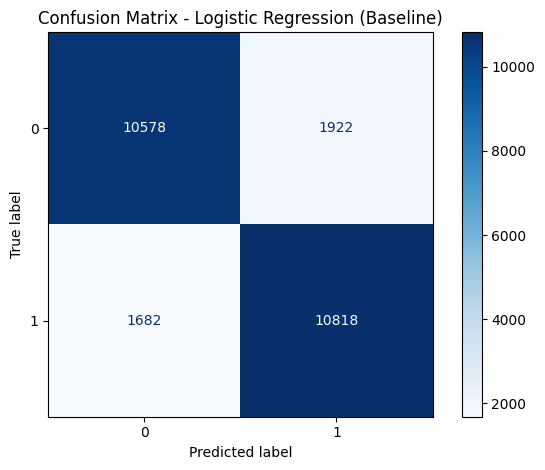

In [20]:
cm_lr_base = confusion_matrix(y_test, lr_base_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_lr_base).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Baseline)")
plt.tight_layout()
plt.show()

### Baseline Model 2: Naive Bayes (Initial Training Results)

In [22]:
nb_base = MultinomialNB(alpha=1.0)
nb_base.fit(X_train_base, y_train)

nb_base_pred = nb_base.predict(X_test_base)
nb_base_acc = accuracy_score(y_test, nb_base_pred)

print("Baseline Naive Bayes Accuracy:", nb_base_acc)
print("\nClassification Report (NB Baseline):\n")
print(classification_report(y_test, nb_base_pred))

Baseline Naive Bayes Accuracy: 0.83464

Classification Report (NB Baseline):

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     12500
           1       0.83      0.84      0.84     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



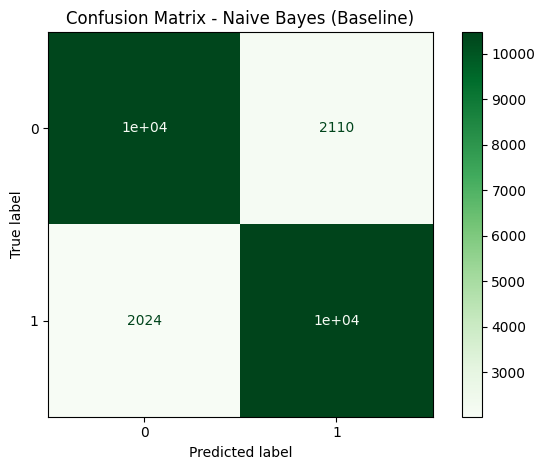

In [23]:
cm_nb_base = confusion_matrix(y_test, nb_base_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_nb_base).plot(cmap="Greens")
plt.title("Confusion Matrix - Naive Bayes (Baseline)")
plt.tight_layout()
plt.show()

### Improved Training (Accuracy Improvement)

In [15]:
tfidf_improved = TfidfVectorizer(
    stop_words="english",
    max_features=20000,     # larger feature set
    ngram_range=(1, 2),     # unigrams + bigrams
    min_df=2,
    max_df=0.9
)

X_train_imp = tfidf_improved.fit_transform(X_train)
X_test_imp = tfidf_improved.transform(X_test)

print("Improved TF-IDF completed")
print("Train shape:", X_train_imp.shape)
print("Test shape :", X_test_imp.shape)

Improved TF-IDF completed
Train shape: (25000, 20000)
Test shape : (25000, 20000)


### Improved Model 1: Logistic Regression (Improved Results)

In [24]:
lr_imp = LogisticRegression(max_iter=1000, C=2.0, solver="liblinear")
lr_imp.fit(X_train_imp, y_train)

lr_imp_pred = lr_imp.predict(X_test_imp)
lr_imp_acc = accuracy_score(y_test, lr_imp_pred)

print("Improved Logistic Regression Accuracy:", lr_imp_acc)
print("\nClassification Report (LR Improved):\n")
print(classification_report(y_test, lr_imp_pred))

Improved Logistic Regression Accuracy: 0.8838

Classification Report (LR Improved):

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     12500
           1       0.89      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



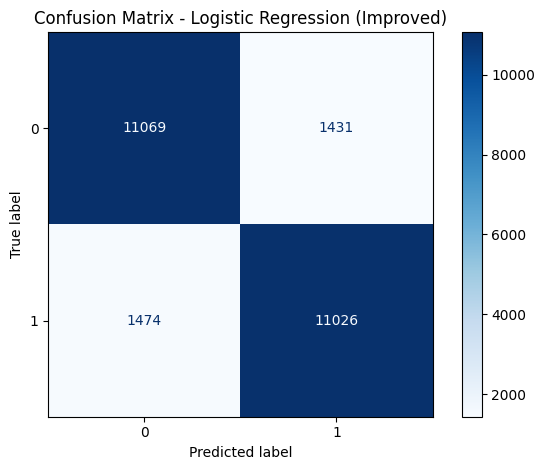

In [25]:
cm_lr_imp = confusion_matrix(y_test, lr_imp_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_lr_imp).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Improved)")
plt.tight_layout()
plt.show()

### Improved Model 2: Naive Bayes (Improved Results)

In [26]:
nb_imp = MultinomialNB(alpha=0.1)
nb_imp.fit(X_train_imp, y_train)

nb_imp_pred = nb_imp.predict(X_test_imp)
nb_imp_acc = accuracy_score(y_test, nb_imp_pred)

print("Improved Naive Bayes Accuracy:", nb_imp_acc)
print("\nClassification Report (NB Improved):\n")
print(classification_report(y_test, nb_imp_pred))

Improved Naive Bayes Accuracy: 0.84736

Classification Report (NB Improved):

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     12500
           1       0.86      0.83      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



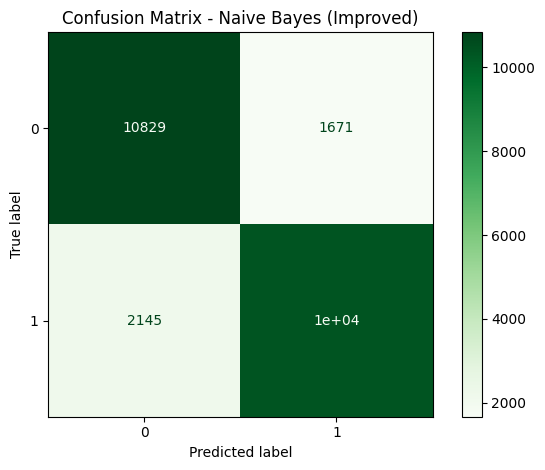

In [27]:
cm_nb_imp = confusion_matrix(y_test, nb_imp_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_nb_imp).plot(cmap="Greens")
plt.title("Confusion Matrix - Naive Bayes (Improved)")
plt.tight_layout()
plt.show()

### Summary: Compare Baseline vs Improved (Accuracy Table + Chart)

In [35]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "Naive Bayes (Baseline)",
        "Logistic Regression (Improved)",
        "Naive Bayes (Improved)"
    ],
    "Accuracy": [lr_base_acc, nb_base_acc, lr_imp_acc, nb_imp_acc]
})

print(results)

                            Model  Accuracy
0  Logistic Regression (Baseline)   0.85584
1          Naive Bayes (Baseline)   0.83464
2  Logistic Regression (Improved)   0.88380
3          Naive Bayes (Improved)   0.84736


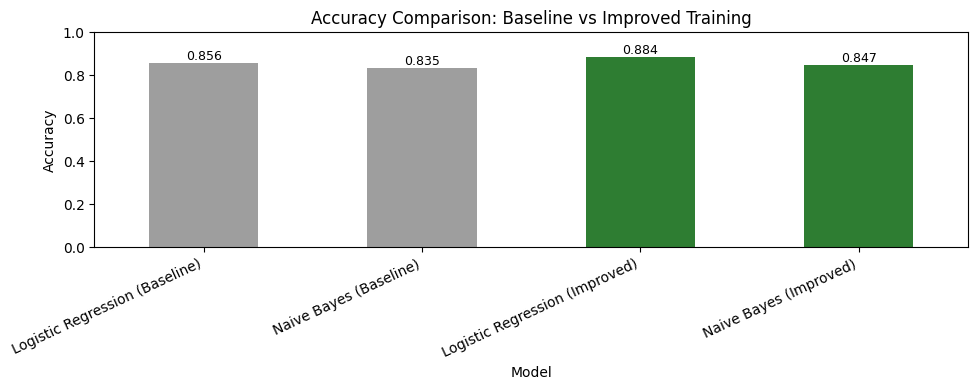

In [36]:
colors = ["#9E9E9E" if "Baseline" in m else "#2E7D32" for m in results["Model"]]  

ax = results.plot(x="Model", y="Accuracy", kind="bar", legend=False, figsize=(10,4), color=colors)

plt.ylim(0, 1)
plt.title("Accuracy Comparison: Baseline vs Improved Training")
plt.ylabel("Accuracy")
plt.xticks(rotation=25, ha="right")

# optional: show values on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

### Model in Action

In [37]:
sample_df = test_df.sample(8, random_state=42).copy()
sample_texts = sample_df["text"].astype(str)

# Vectorize using improved TF-IDF
sample_vec = tfidf_improved.transform(sample_texts)

# Predictions + probabilities
lr_preds = lr_imp.predict(sample_vec)
lr_probs = lr_imp.predict_proba(sample_vec)[:, 1]   # probability of class 1 (positive)

nb_preds = nb_imp.predict(sample_vec)
nb_probs = nb_imp.predict_proba(sample_vec)[:, 1]   # probability of class 1 (positive)

print("===== MODEL IN ACTION: SAMPLE TEST REVIEWS =====")
for i in range(len(sample_df)):
    text_short = sample_texts.iloc[i].replace("\n", " ")
    text_short = text_short[:300] + ("..." if len(text_short) > 300 else "")

    true_label = int(sample_df["label"].iloc[i])

    print("-" * 90)
    print("REVIEW:", text_short)
    print("TRUE LABEL:", true_label, "(1=Positive, 0=Negative)")
    print("LR  PRED:", int(lr_preds[i]), " | P(Positive):", round(float(lr_probs[i]), 4))
    print("NB  PRED:", int(nb_preds[i]), " | P(Positive):", round(float(nb_probs[i]), 4))

===== MODEL IN ACTION: SAMPLE TEST REVIEWS =====
------------------------------------------------------------------------------------------
REVIEW: I hate guns and have never murdered anyone, but when even half of the events that take place in 'Shuttle' happen to you or close ones and you find a gun, YOU SHOOT YOUR ATTACKER. THREE TIMES. FIVE TIMES. Whatever makes the pulse stop on them and increase on you. I think even God would say, "Good cal...
TRUE LABEL: 0 (1=Positive, 0=Negative)
LR  PRED: 0  | P(Positive): 0.2212
NB  PRED: 0  | P(Positive): 0.1786
------------------------------------------------------------------------------------------
REVIEW: If you are like me and you bought the new Tenacious D album the day it came out, and went into the film knowing all the lyrics to all the songs....then you will CERTAINLY enjoy this film. Yes I am biased as a huge Tenacious D fan, but i really did like this film which made me chuckle quite a lot.<br...
TRUE LABEL: 1 (1=Positive, 0=Negativ